# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 8 апреля, -4 балла после 06:00 15 апреля, -6 баллов после 06:00 22 апреля  -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

In [2]:
%%latex
\begin{equation*}
\sigma = \frac{1}{n} \left( \sum_{i=1}^n 2 x_i(y_i - (x_i, w)) \frac{1}{D} \right)   
\end{equation*}
\begin{equation*}
R(w) = \left( \sum_{i=1}^D w_i^2 \right)
\end{equation*}
\begin{equation*}
w_n = w_o - \alpha \sigma  + \frac{1}{C} R(w)
\end{equation*}

<IPython.core.display.Latex object>

***Ваше решение здесь***

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

In [3]:
%%latex
\begin{equation*}
M_i = y_i (x_i, w)
\end{equation*}
\begin{equation*}
\sigma = \frac{1}{n} \left( \sum_{i=1}^n x_i(y_i - \frac{1}{1 + e^{-M_i}})  \right)
\end{equation*}
\begin{equation*}
R(w) = \left( \sum_{i=1}^D w_i^2 \right)
\end{equation*}
\begin{equation*}
w_n = w_o + \alpha \sigma  + \frac{1}{C} R(w)
\end{equation*}

<IPython.core.display.Latex object>

***Ваше решение здесь***

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией

In [4]:
%%latex
\begin{equation*}
Xw = Y
\end{equation*}
\begin{equation*}
X^T Xw = X^T Y
\end{equation*}
\begin{equation*}
X^T X - квадратная  
\end{equation*}
\begin{equation*}
(X^T X)^{-1}X^T Xw = (X^T X)^{-1}X^T Y
\end{equation*}
\begin{equation*}
w = (X^T X)^{-1}X^T Y
\end{equation*}

\begin{equation*}
\end{equation*}

\begin{equation*}
получаем \ точное \ решение \ СЛАУ \ Xw = y \ для \ которого \ в \ каждом \ предсказании \ из \ тренировочной \ выборки \ нулевая \ ошибка.
\end{equation*}
\begin{equation*}
Матрица \ (X^TX)^{-1} \ существует \ только \ если \ X^TX \ невырожденна \ т.е. \ имеет \ полный \ ранг
\end{equation*}
\begin{equation*}
СЛАУ \ будет \ иметь \ точное \ решение \ только \ если \ количество \ переменных \ будет \ меньше \ или \ равно \ количеству \ уравнений
\end{equation*}
\begin{equation*}
т.е. \ если \ матрица \ X \ имеет \ строк \ не \ меньше, \ чем \ столбцов
\end{equation*}
\begin{equation*}
так \ как \ ошибка \ равна \ нулю \ на \ всех \ наборах \ - \ это \ минимум
\end{equation*}

\begin{equation*}
\end{equation*}


\begin{equation*}
\frac{\partial\mathcal{L}}{\partial w} = \frac{\partial}{\partial w} \frac{1}{2n}(y^Ty - 2y^TXw + w^TX^TXw) = \frac{1}{2n}(-2X^Ty+2X^TXw)
\end{equation*}
\begin{equation*}
\frac{\partial\mathcal{L}}{\partial w} = 0
\end{equation*}
\begin{equation*}
\frac{1}{2n}(-2X^Ty+2X^TXw) = 0
\end{equation*}
\begin{equation*}
-X^Ty + X^TXw = 0
\end{equation*}
\begin{equation*}
X^TXw = X^Ty
\end{equation*}
\begin{equation*}
w = (X^TX)^{-1}X^Ty
\end{equation*}

\begin{equation*}
\end{equation*}

\begin{equation*}
Точное \ решение \ для \ модели \ с  \ L2 \ регуляризацией:
\end{equation*}
\begin{equation*}
w = (X^TX + \frac{1}{C}I)^{-1}X^Ty
\end{equation*}
\begin{equation*}
w = (X^TX + \psi E)^{-1}X^Ty
\end{equation*}

<IPython.core.display.Latex object>

***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

In [5]:
%%latex
\begin{equation*}
-p ln(\frac{1}{1 + e ^{-M}}) - (1-p)ln(1 - \frac{1}{1 + e^{-M}}) = pln(1 + e ^{-M}) + (1-p)ln(\frac{1}{1 + e^{-M}})
\end{equation*}
\begin{equation*}
p\frac{1}{1 + e^{-M}}e^{-M} + (1-p)\frac{1}{1 + e^{-M}}e^{M}=0
\end{equation*}
\begin{equation*}
-p + (1-p)e^M=0
\end{equation*}
\begin{equation*}
e^M=\frac{p}{1-p}
\end{equation*}
\begin{equation*}
\frac{1}{1 + e^{-M}}=\frac{1}{1+\frac{1-p}{p}} = \frac{p}{p+1-p} = p 
\end{equation*}

<IPython.core.display.Latex object>

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [6]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [7]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [8]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [9]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [36]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import random
from sklearn import datasets

#def batch_generator(X, y, shuffle=True, batch_size=1):
    
#    Гератор новых батчей для обучения
#    X          - матрица объекты-признаки
#    y_batch    - вектор ответов
#    shuffle    - нужно ли случайно перемешивать выборку
#    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
#    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    
    
    
def my_batch_generator (X, y, my_shuffle=True, batch_size=100): 
    if my_shuffle:
        X, y = shuffle(X, y, random_state=0)
    X_batch = np.zeros(shape=(batch_size, len(X[0])))
    y_batch = np.zeros(shape=batch_size)
    
    for i in range(0, len(X) - batch_size, batch_size):
        X_batch = [X[j] for j in range(i, i+batch_size)]
        y_batch = [y[j] for j in range(i, i+batch_size)]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [73]:
#%% pycodestyle
#my kaggle name: _And_

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=20,
                 model_type='lin_reg', batch_size=1, drag=1):
        """
        batch_generator - функция генератор, которой будем создавать батчи
        batch_size      - количество элементов в батче
        C               - коэф. регуляризации
        alpha           - скорость спуска
        max_epoch       - максимальное количество эпох
        model_type      - тим модели, lin_reg или log_reg
        drag            - коэффициент торможения обучения для улучшения сходимости

        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size
        self.drag = drag

    def calc_loss(self, X_batch, y_batch, test_val=True):
        """
        Считаем функцию потерь по батчу 

        X_batch  - матрица объекты-признаки по батчу
        y_batch  - вектор ответов по батчу
        test_val - является ли тестовой выборкой, если является - добавляет 
                   колонку единиц для учёта w_0
        """
        if (test_val):
            X_batch = self.adds_column_of_ones(X_batch)

        loss = -1
        if (self.model_type == 'lin_reg'):
            arg = [(y_batch[i] - np.dot(self.weights, X_batch[i])) ** 2 for i in range(len(X_batch))]
            loss = sum(arg) / len(y_batch)

        elif (self.model_type == 'log_reg'):
            arg = 0
            for i in range(len(X_batch)):
                s = sigmoid(np.dot(self.weights, X_batch[i]))
                arg += -y_batch[i] * np.log(s) - (1 - y_batch[i]) * np.log(1 - s)
            loss = arg / len(X_batch)

        return loss + sum(self.weights[1:] ** 2) / self.C

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем градиент функции потерь по батчу (то что Вы вывели в задании 1)

        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        """
        res = np.zeros(shape=len(self.weights))
        loss_grad = 0
        if (self.model_type == 'lin_reg'):
            for i in range(len(X_batch)):
                arg = np.dot(self.weights, X_batch[i]) - y_batch[i]
                res += 2 * X_batch[i] * arg / len(X_batch[0]) + 2 * sum(self.weights[1:]) / self.C
            loss_grad = -res / len(X_batch)

        elif (self.model_type == 'log_reg'):
            for i in range(len(X_batch)):
                res += X_batch[i] * (y_batch[i] - sigmoid(np.dot(self.weights, X_batch[i])))
            loss_grad = res / len(X_batch)

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = (self.weights + self.alpha * new_grad) / (1 + 1 / self.C)
        pass

    def adds_column_of_ones(self, X):
        """
        добавляет колонку единиц для учёта w_0
        """
        a = np.ones(len(X), dtype=int).reshape(len(X), 1)
        X = np.column_stack((a, X))
        return X

    def fit(self, X, y):
        """
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        """
        self.cl_names = np.array(list(map(int, np.unique(y))))
        fit_complete = 0;
        y = [int(y[i]) for i in range(len(y))]
        self.weights = np.array([random.uniform(-0.1, 0.1) for i in range(len(X[0]) + 1)])
        self.result = np.zeros(shape=10000)
        iteration = 0
        X = self.adds_column_of_ones(X)

        for n in range(0, self.max_epoch):
            X, y = shuffle(X, y, random_state=0)
            prev_weights = self.weights
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]

                batch_loss = self.calc_loss(X_batch, y_batch, test_val=False)
                if (iteration < 10000):
                    self.result[iteration] = batch_loss
                    iteration += 1

                batch_grad = self.calc_loss_grad(X_batch, y_batch)  #

                prev_batch_grad = batch_grad
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
            self.alpha /= self.drag
            print(n, ' = ', self.calc_loss(X, y, test_val=False))
            if (np.sum(abs(prev_weights - self.weights)) < 0.e-4):
                print('last epoch: ', n)
                break;
            if (fit_complete):
                break;
        return self

    def predict(self, X):
        """
        Предсказание класса
        X - матрица объекты-признаки
        """
        X = self.adds_column_of_ones(X)
        y_hat = [np.dot(X[i], self.weights) for i in range(len(X))]
        self.proba = [self.cl_names[np.argmin(abs(self.cl_names - y_hat[i]))] for i in range(len(y_hat))]
        return y_hat

    def score(self, X, y):
        """
        считает точность фактического предсказания принадлежности объекта классу
        """
        right_choice = 0
        for i in range(len(y)):
            if (y[i] == self.proba[i]):
                right_choice += 1
        return right_choice / len(y)


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [12]:
#best batch_size = 5
iris = datasets.load_iris()
df = np.array(iris)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
my_clf = MySGDClassifier(batch_generator=my_batch_generator, alpha=0.09, C=2000, batch_size=5, max_epoch=20, drag=1.05)

In [15]:
%time my_clf.fit(X_train, y_train)

0  =  1.4244489134482003
1  =  1.665799969544147
2  =  1.3594435671858744
3  =  1.1140494522765134
4  =  0.9031187211660955
5  =  0.601847100889826
6  =  0.3645660038202029
7  =  0.24591492962684422
8  =  0.15689065888276302
9  =  0.1449731208035884
10  =  0.137283822076214
11  =  0.1320413810682319
12  =  0.12655252679615653
13  =  0.12131002172004801
14  =  0.11691892759839849
15  =  0.11433887126537683
16  =  0.11040923590199907
17  =  0.10719268144476903
18  =  0.10474985904007916
19  =  0.10231835947400499
Wall time: 101 ms


MySGDClassifier(C=2000, alpha=0.03392005345857002,
        batch_generator=<function my_batch_generator at 0x00000266628F2EA0>,
        batch_size=5, drag=1.05, max_epoch=20, model_type='lin_reg')

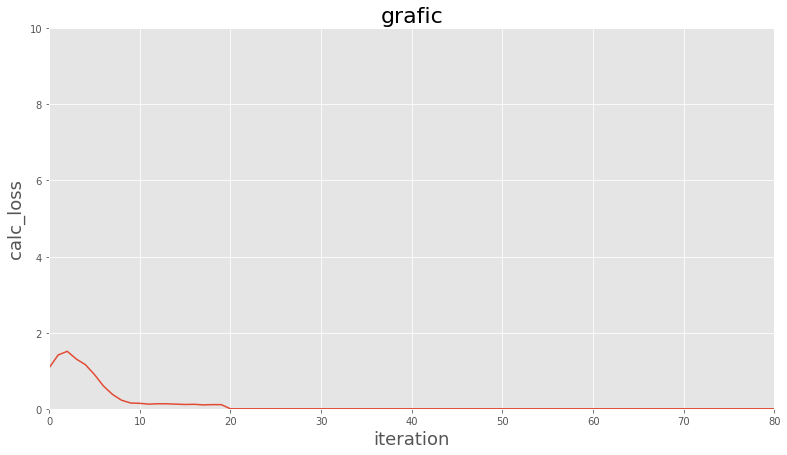

In [16]:
import pylab
fig = pylab.figure(figsize = (13, 7))
ax = fig.add_subplot(111) 
ax.plot(my_clf.result)
pylab.ylim(0, 10)
pylab.xlim(0, 80)
pylab.xlabel('iteration', size=18)
pylab.ylabel('calc_loss', size=18)
ax.set_title('grafic', size=22)

pylab.show()

In [17]:
%time my_clf.calc_loss(X_test, y_test)

Wall time: 0 ns


0.11221697191655297

In [18]:
my_clf.predict(X_test)
my_clf.score(X_test, y_test)

0.9333333333333333

0  =  0.5538732539995338
1  =  0.5253484372372758
2  =  0.48683017067931494
3  =  0.4864823736191846
4  =  0.45888478793281595
5  =  0.4819816550571281
6  =  0.4262552009984225
7  =  0.42550371155607075
8  =  0.42220434690995867
9  =  0.4549870075459347
10  =  0.4409076230382949
11  =  0.3925772486778569
12  =  0.41825458674764515
13  =  0.39225536089211777
14  =  0.37975907949426985
15  =  0.41688175883084716
16  =  0.37376362381742545
17  =  0.37116233738050597
18  =  0.37223534424116655
19  =  0.3750552452785106
20  =  0.37215270754535007
21  =  0.3655409628272802
22  =  0.36500371809281756
23  =  0.3688512010414593
24  =  0.36092406475305766
25  =  0.3631850348072689
26  =  0.393701557041567
27  =  0.3602502499557064
28  =  0.3585434284760878
29  =  0.3592048010726202
Wall time: 531 ms
0  =  0.7667420597559832
1  =  0.7469033454666342
2  =  0.7277213095848106
3  =  0.7091931508622341
4  =  0.6959548491793571
5  =  0.6835169536226681
6  =  0.6637292201624237
7  =  0.6514796816981868

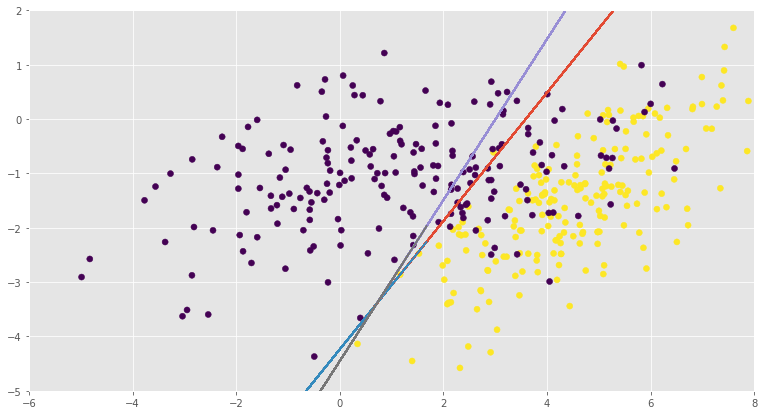

In [19]:
import pylab
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

fig = pylab.figure(figsize = (13, 7)) 

my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type='log_reg', max_epoch=30, alpha=0.8, C=200, batch_size=50, drag=1.02)
%time my_clf.fit(X, y)
plt.plot(X, -(my_clf.weights[0] + my_clf.weights[1]*X) / my_clf.weights[2])

y = y * 2 - 1

clf = MySGDClassifier(batch_generator=my_batch_generator, model_type="lin_reg", max_epoch=30, alpha=0.08, C=200, batch_size=30)
%time clf.fit(X, y)
plt.plot(X, -(clf.weights[0] + clf.weights[1]*X) / clf.weights[2])

#model_type="lin_reg", max_epoch=30, alpha=0.05, C=200, batch_size=50

pylab.ylim(-5, 2)
pylab.xlim(-6, 8)
plt.scatter(X[:,0], X[:,1], c=y)
#my_clf = MySGDClassifier(batch_generator=my_batch_generator, alpha=0.3, C=20000, batch_size=100, max_epoch=40, drag=1.1)
#my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type="log_reg", alpha=0.4, C=20000, batch_size=100, max_epoch=40, drag=1.05)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [20]:
from sklearn.datasets import make_classification

In [21]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [22]:
## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)
my_clf = MySGDClassifier(batch_generator=my_batch_generator, max_epoch=6, alpha=0.5, C=10000, batch_size=50)

In [23]:
%time my_clf.fit(X_train, y_train)

0  =  0.04044150420373798
1  =  0.040658897870903224
2  =  0.04052919241269165
3  =  0.04044705706275687
4  =  0.04071122758886905
5  =  0.040538381226996795
Wall time: 26.1 s


MySGDClassifier(C=10000, alpha=0.5,
        batch_generator=<function my_batch_generator at 0x00000266628F2EA0>,
        batch_size=50, drag=1, max_epoch=6, model_type='lin_reg')

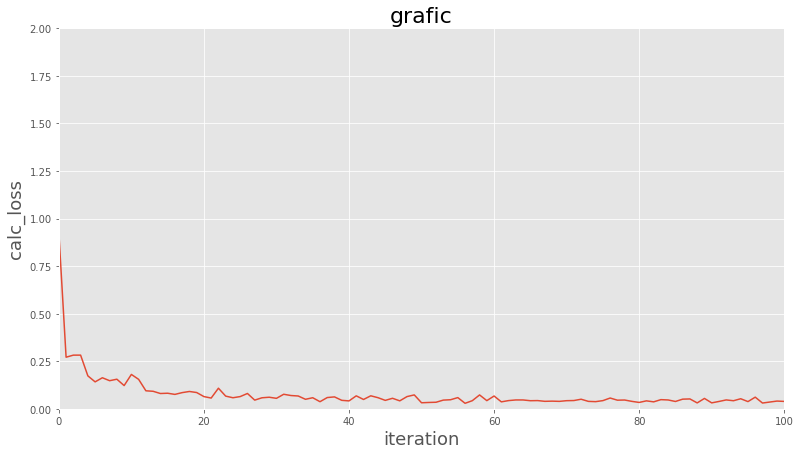

In [24]:
import pylab
fig = pylab.figure(figsize = (13, 7))
ax = fig.add_subplot(111) 
ax.plot(my_clf.result)
pylab.ylim(0, 2)
pylab.xlim(0, 100)
pylab.xlabel('iteration', size=18)
pylab.ylabel('calc_loss', size=18)
ax.set_title('grafic', size=22)

pylab.show()

In [25]:
%time my_clf.calc_loss(X_test, y_test)

Wall time: 8.4 ms


0.04181955539469663

In [26]:
my_clf.predict(X_test)
my_clf.score(X_test, y_test)
#alpha = 0.1, step.alpha /= 2, batch_size = 50, max_epoch = 30:     0.8025
#alpha = 0.1, step.alpha /= 2, batch_size = 100, max_epoch = 30:    0.8105
#max_epoch=6, alpha=0.5, C=10000, batch_size=50:                    0.989 

0.986

In [44]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)
my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type='log_reg', max_epoch=1, alpha=0.05, C=200, batch_size=20, drag=1.1)

In [372]:
%time my_clf.fit(X_train, y_train)

0  =  0.18036870856373532
Wall time: 4.08 s


MySGDClassifier(C=200, alpha=0.045454545454545456,
        batch_generator=<function my_batch_generator at 0x00000191488A50D0>,
        batch_size=20, drag=1.1, max_epoch=1, model_type='log_reg')

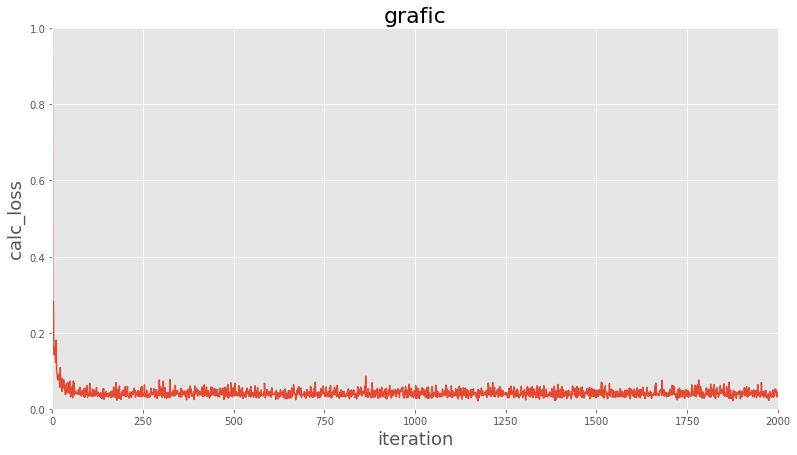

In [27]:
import pylab
fig = pylab.figure(figsize = (13, 7))
ax = fig.add_subplot(111) 
ax.plot(my_clf.result)
pylab.ylim(0, 1)
pylab.xlim(0, 2000)
pylab.xlabel('iteration', size=18)
pylab.ylabel('calc_loss', size=18)
ax.set_title('grafic', size=22)

pylab.show()
#резкое падение ошибки до нуля - конец обучения

In [28]:
%time my_clf.calc_loss(X_test, y_test)

Wall time: 47.2 ms


0.04181955539469663

In [29]:
my_clf.predict(X_test)
my_clf.score(X_test, y_test)

0.986

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

In [ ]:
#при изначально больших alpha ( > 1) ошибка резко увеличивается, 
#в то время как для для слишком маленьких ( < 0.01) не успевает сойтись за отведённые эпохи.
#эмперическим путём было получено что лучшую сходимость на предложенных данных наиименьшую ошибку обеспечивают
#alpha порядка 0.01 с коффициентом торможения (drag) 1.1

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [45]:
grafic = np.zeros(shape=len(np.logspace(3, -3, 10)))
j = 0
for i in range(len(np.logspace(3, -3, 10))):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)
    my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type='lin_reg', max_epoch=1, alpha=0.01, C=np.logspace(3, -3, 10)[i], batch_size=50, drag=1.1)
    my_clf.fit(X_train, y_train)
    grafic[i] = np.mean(my_clf.weights)

0  =  0.10500299903188208
0  =  0.2075638069549976
0  =  0.35997227650567815
0  =  0.4605378106047208
0  =  0.4910172555135705
0  =  0.4980968554559588
0  =  0.4996477350508956
0  =  0.5000021046519274
0  =  0.5000812251815283
0  =  0.5000967056856289


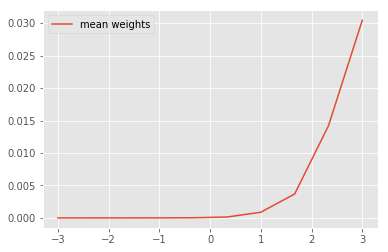

In [51]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
x = np.linspace(3, -3, 10)
y = grafic
# Plot the data
plt.plot(x, y, label='mean weights')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [58]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [59]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [60]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [61]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [229]:
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)
print(X_train[:10])
X_train = scaler.transform(X_train)
print(X_train[:10])

StandardScaler(copy=True, with_mean=True, with_std=True)
[3.25543199 2.62147134 2.33088109 2.13404619 1.98973482 1.87938409
 1.78887938 1.70196749 1.63378956 1.57690334 1.52788708 1.47698888
 1.43062447 1.38477331 1.33977759]
[[4 4 3 3 3 2 2 2 2 2 2 2 2 1 1]
 [8 7 7 7 7 7 4 4 3 3 2 2 2 2 2]
 [2 2 2 2 2 2 2 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 1 1 1 1 1 1 1 1 1]
 [4 3 2 2 2 2 2 2 2 2 2 2 2 1 1]
 [2 2 2 2 1 1 1 1 1 1 1 1 1 1 1]]
[[ 0.28851817  0.64985075  0.34754853  0.48147109  0.59175091  0.07308688
   0.13221894  0.19461288  0.24432264  0.28747714  0.32706765  0.36947476
   0.40832322 -0.2798612  -0.25235498]
 [ 1.83850779  2.06407761  2.42519734  2.70547468  2.9347037   3.10282323
   1.38476303  1.50059713  0.91148724  0.96693684  0.32706765  0.36947476
   0.40832322  0.44747927  0.49035139]
 [-0.48647664 -0.29296716 -0.17186368 -0.0745298   0.00601271  0.0730

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [62]:
X = X_train
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)
my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type='log_reg', max_epoch=13, alpha=0.04, C=20000, batch_size = 25, drag=1.05)
#model_type='log_reg', max_epoch=30, alpha=0.5, C=20000, batch_size = 25

In [63]:
%time my_clf.fit(X_train, y_train)

0  =  0.571708656578719
1  =  0.5315073183633114
2  =  0.5137580474518334
3  =  0.49957697715201566
4  =  0.49313799217568777
5  =  0.48949345003268496
6  =  0.4880385769022382
7  =  0.48575701710248703
8  =  0.4849327113671571
9  =  0.4873799673227195
10  =  0.48205836279566955
11  =  0.48439653278782074
12  =  0.48260632981030444
Wall time: 7.49 s


MySGDClassifier(C=20000, alpha=0.02121285402581178,
        batch_generator=<function my_batch_generator at 0x000002666559BA60>,
        batch_size=25, drag=1.05, max_epoch=13, model_type='log_reg')

In [64]:
%time my_clf.calc_loss(X_test, y_test)

Wall time: 3.94 ms


0.5490435395768282

In [65]:
my_clf.predict(X_test)

[0.8266345087699336,
 0.8771503461524355,
 -1.2372947692793208,
 2.0961969610000866,
 -0.8601595184299371,
 -2.1885874902546383,
 -2.1542256116171257,
 -1.9545484359198897,
 -0.8349899138374612,
 -1.536485841973455,
 -1.198316893773559,
 -0.3125775430358497,
 -1.2211963919440427,
 -2.046673820341704,
 -1.0362809988606574,
 -0.9318721393008091,
 1.10526174027925,
 -1.7548828330789281,
 -1.3979940694707953,
 -2.1542256116171257,
 -1.9155474512294295,
 0.3141461905191021,
 -0.44317391652343896,
 -1.3979940694707953,
 -2.1542256116171257,
 -2.119341604003308,
 -1.0170374718026234,
 -0.7110084135757941,
 -1.159315909083099,
 1.229672803426621,
 -1.3979940694707953,
 2.5131769202886423,
 1.070377732665433,
 -2.1542256116171257,
 -0.4030843669367681,
 -1.6604673422351222,
 -2.1542256116171257,
 -0.8001059062236437,
 0.018075735189095887,
 -1.3631100618569776,
 -0.11935015652285252,
 2.3415643276821374,
 -1.3979940694707953,
 0.5874875889448428,
 -1.5563374483699746,
 -1.3979940694707953,
 1.7

In [66]:
my_clf.score(X_test, y_test)

0.7350427350427351

In [67]:
my_clf = MySGDClassifier(batch_generator=my_batch_generator, max_epoch=10, alpha=0.1, C=20000, batch_size = 1, drag=1.05)

In [68]:
%time my_clf.fit(X_train, y_train)

0  =  0.1578713237416963
1  =  0.15835496390719922
2  =  0.15948761483176754
3  =  0.15657837946742065
4  =  0.15688560287008083
5  =  0.15623170248722648
6  =  0.15861652823391148
7  =  0.15643655053146355
8  =  0.15610657911236325
9  =  0.1587634107085248
Wall time: 4.74 s


MySGDClassifier(C=20000, alpha=0.06139132535407589,
        batch_generator=<function my_batch_generator at 0x000002666559BA60>,
        batch_size=1, drag=1.05, max_epoch=10, model_type='lin_reg')

In [69]:
%time my_clf.calc_loss(X_test, y_test)

Wall time: 7.3 ms


0.18998182426832438

In [70]:
my_clf.predict(X_test)

[0.6583920967239464,
 0.7573496662898183,
 0.22497686829867175,
 0.988211159589685,
 0.32989521766536434,
 0.04830165699323641,
 0.034889979589846694,
 0.11207089686372124,
 0.35418052009819895,
 0.18488715720390958,
 0.27506501132259364,
 0.4842032151527662,
 0.2398032493719855,
 0.07031066649070834,
 0.30081401485333364,
 0.28398624406053047,
 0.7839575005250052,
 0.15390416636168242,
 0.19788409404871912,
 0.034889979589846694,
 0.08843338123672265,
 0.6010532402403383,
 0.5995496898817925,
 0.19788409404871912,
 0.034889979589846694,
 0.054800125415641165,
 0.33951685252244956,
 0.35437974008518675,
 0.2514274956955951,
 0.8329265255778533,
 0.19788409404871912,
 1.0756549316313815,
 0.7640473546992108,
 0.034889979589846694,
 0.41442161015446743,
 0.18468793721692178,
 0.034889979589846694,
 0.3740906659239934,
 0.5699775973900577,
 0.21779423987451357,
 0.4909009035621587,
 1.0237908308241204,
 0.19788409404871912,
 0.6140003987826506,
 0.21109655146512102,
 0.19788409404871912,


In [71]:
my_clf.score(X_test, y_test)

0.7606837606837606

In [308]:
import pandas as pd
train_data = pd.read_csv('test_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [309]:
import numpy as np
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target) in enumerate(docs):
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
groups_train = np.array(groups_train)
X_train[:50]

array([[ 3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1],
       [ 5,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 6,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 6,  5,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11, 10,  5,  5,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1],
       [ 2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1],
       [ 4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2],
       [ 3,  3,  2,  2,  2,  2,  2

In [243]:
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)
print(X_train[:10])
X_train = scaler.transform(X_train)
print(X_train[:10])

StandardScaler(copy=True, with_mean=True, with_std=True)
[3.27335057 2.61688819 2.32579539 2.14404282 2.00637517 1.89571179
 1.80140735 1.71137307 1.64124617 1.57208155 1.51217899 1.45648644
 1.40867264 1.36512901 1.32375053]
[[ 3  3  2  2  2  2  2  2  2  2  2  1  1  1  1]
 [ 5  3  3  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 6  5  5  5  5  5  5  4  4  4  4  4  4  4  4]
 [ 6  5  4  4  4  4  4  3  3  3  3  3  3  3  3]
 [ 4  3  3  3  2  2  2  2  2  2  2  2  2  2  2]
 [ 3  3  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11 10  5  5  4  4  4  4  4  3  3  3  3  3  3]
 [ 1  1  1  1  1  1  1  1  0  0  0  0  0  0  0]]
[[-0.09960999  0.17383214 -0.16130939 -0.07543931 -0.00347823  0.05915747
   0.11615608  0.1763277   0.22586166  0.28046378  0.32809654 -0.31559104
  -0.28701374 -0.25952987 -0.23333124]
 [ 0.62919761  0.17383214  0.33381545 -0.07543931 -0.00347823  0.05915747
   0.11615608  0.1763277   0.225

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [310]:
import csv
my_clf.predict(X_train)
with open('sample_submission.csv', 'w') as f:
    fieldnames = ['pair_id', 'target']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    i = 11691
    for elem in my_clf.proba:
        writer.writerow({'pair_id': str(i), 'target': str(elem)})
        i += 1
f.close()

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?

логистическая регрессия лучше подходит для разделения на 2 класса
так же она лучше описывает вероятность определения верного класса

***Ваше ответ здесь***

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

In [ ]:
линейные модели хорошо описывают линейно разделимые данные:))))


***Ваше ответ здесь***

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

O(N * D)
O(D)
O(D)

***Ваше ответ здесь***

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

быстрая обучаемость, недостаток сходимость хуже чем у мини-батч, меньше данных в оперативной памяти

***Ваше ответ здесь***

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

In [ ]:
до так как после спуска мы получим ошибку на моделе со специально минимизироанной ошибкой, 
что не отражает реальную обобщающую способность алгоритма

***Ваше ответ здесь***

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

подходят для быстрой оценки алгоритма на линейную разделимость, и быстрого решения простых задач

***Ваше ответ здесь***

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

как подбирать ядра (не брать рандомные) для перевода признаков в пространство большей размерности
для получения линейно разделимых данных

***Ваше ответ здесь***

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

интересное задание, но я бы поменял построение графика зависимости от C на перевод
данных в другие пространства с помощью ядер

*** ВАШ ОТЗЫВ ЗДЕСЬ***